In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import math

In [2]:
dane_leki = pd.read_excel('dane_leki.xlsx')
dane_leki = dane_leki.drop("Unnamed: 0",axis=1)


In [3]:
dane_leki.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


In [4]:
correla  = dane_leki.corr()
correla 

,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logK HSA,1.000000,0.799757,-0.720084,0.598914,-0.306897
logKCTAB,0.799757,1.000000,-0.633481,0.446144,-0.135951
CATS3D_00_DD,-0.720084,-0.633481,1.000000,-0.291248,0.290864
CATS3D_09_AL,0.598914,0.446144,-0.291248,1.000000,0.326375
CATS3D_00_AA,-0.306897,-0.135951,0.290864,0.326375,1.000000


CORRELATION 

In [ ]:
list_of_names = list(correla)
for col_name in list_of_names:
    for i,col_name_y in enumerate(list_of_names):
        x = correla.get(col_name) 
        y = correla.iloc[i]
        plt.scatter(x,y)
        plt.xlabel(col_name)
        plt.ylabel(col_name_y)
        plt.show()


HEATMAP

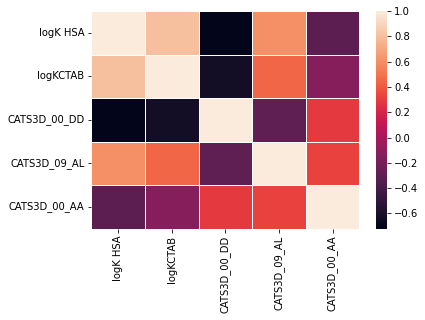

In [13]:
ax = sns.heatmap(correla, linewidth=0.5)
plt.show()

RÓWNANIE MODELU 

In [14]:
dane_leki.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


In [15]:
dane_leki_np = dane_leki.to_numpy()

In [16]:
X_train, y_train = dane_leki_np[:, 2:6], dane_leki_np[:,1]
X_train.shape, y_train.shape

((27, 4), (27,))

In [17]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)

In [18]:
predictions_dane_leki = pd.DataFrame({'logKCTAB':dane_leki['logKCTAB'],
                               'CATS3D_00_DD':dane_leki['CATS3D_00_DD'],
                               'CATS3D_09_AL':dane_leki['CATS3D_09_AL'],
                               'CATS3D_00_AA':dane_leki['CATS3D_00_AA'],
                               'Zbiór':dane_leki['Zbiór'],
                               'Sklearn logK HSA Predictions':sklearn_y_predictions})
predictions_dane_leki

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór,Sklearn logK HSA Predictions
0,-0.63,2,0,2,t,-0.475707
1,1.22,1,0,4,t,0.383042
2,0.57,1,0,3,t,0.208196
3,0.68,0,0,3,t,0.471586
4,1.50,0,0,2,t,1.117494
5,0.26,2,0,1,t,0.209284
6,1.25,0,0,3,t,0.789837
7,1.09,0,3,6,t,0.958379
8,0.46,0,0,2,t,0.536825
9,0.73,1,0,1,t,0.673675


R^2

In [19]:
logKCTAB = predictions_dane_leki['logKCTAB']
Sklearn_logK_HSA_Predictions = predictions_dane_leki['Sklearn logK HSA Predictions']

In [20]:
def R_2():
    mean_obs = logKCTAB.mean()
    licznik__ = Sklearn_logK_HSA_Predictions - logKCTAB
    licznik = sum(licznik__**2)
    mianownik__ = logKCTAB - mean_obs
    mianownik = sum(mianownik__**2)
    mianownik
    return 1 - (licznik / mianownik)


In [21]:
R_2()

0.44605653147497537

RMSE_c

In [22]:
MSE_c = np.square(np.subtract(logKCTAB.where(predictions_dane_leki['Zbiór']=='t'),Sklearn_logK_HSA_Predictions.where(predictions_dane_leki['Zbiór']=='t'))).mean() 
 
RMSE_c= math.sqrt(MSE_c)
print("Root Mean Square Error:\n")
print(RMSE_c)

Root Mean Square Error:

0.3839500204194289


RMSE_ex

In [23]:
MSE_ex = np.square(np.subtract(logKCTAB.where(predictions_dane_leki['Zbiór']=='w'),Sklearn_logK_HSA_Predictions.where(predictions_dane_leki['Zbiór']=='w'))).mean() 
 
RMSE_ex= math.sqrt(MSE_ex)
print("Root Mean Square Error:\n")
print(RMSE_ex)

Root Mean Square Error:

0.8504710233414131


F

In [24]:
# Wariancja modelu 
def S_2_M():
    licznik__ = (Sklearn_logK_HSA_Predictions - Sklearn_logK_HSA_Predictions.mean())**2
    licznik = sum(licznik__)
    return licznik / (len(Sklearn_logK_HSA_Predictions) - 1)

In [25]:
S_2_M()

1.01217371199395

In [26]:
# Wariancja resztowa
def S_2_E():
    licznik__ = (logKCTAB - Sklearn_logK_HSA_Predictions)**2
    licznik = sum(licznik__)
    return licznik / (len(logKCTAB) - 4 - 1)

In [27]:
S_2_E()

0.39033374717130176

In [28]:
F = S_2_M() / S_2_E()
F

2.593098135452141

Q_2ex


In [29]:
def Q_2():
    mean_pred = Sklearn_logK_HSA_Predictions.mean()
    licznik__ = Sklearn_logK_HSA_Predictions - logKCTAB
    licznik = sum(licznik__**2)
    mianownik__ = Sklearn_logK_HSA_Predictions - mean_pred
    mianownik = sum(mianownik__**2)
    return 1 - (licznik / mianownik)

In [30]:
Q_2()

0.6736900024779402

WYKRES WILLIAMSA

In [31]:
h = (3*4 + 1) / len(logKCTAB)
h

0.48148148148148145